# Data Exploration of Boston Housing Dataset

## import libraries

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy.stats import pearsonr, scoreatpercentile
from scipy.spatial.distance import euclidean

## load the data set

In [4]:
boston = datasets.load_boston()

In [5]:
type(boston)

sklearn.datasets.base.Bunch

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)# convert data into dataframe with columns as features
df['MEDV'] = boston.target # add the target data to the dataframe  as another column and name it 'MEDV'

In [7]:
#df.columns.names = ['Index']
df.shape

(506, 14)

In [8]:
pd.isnull(df).any() # check if there is any null value in the dataset. 
# As we did not find any null value in the dataset, we move forward to further analysis

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [9]:
df.head(10) # To know different types of values in the dataframe and to get a broad picture of how the data looks, we use head() and display rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
df.describe() # describe() tells us the statistical summaries of each feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


## 1. housing Price Analysis

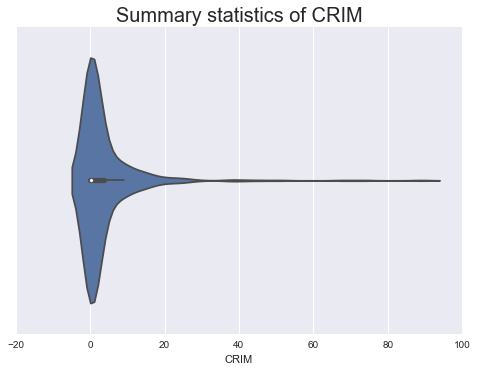

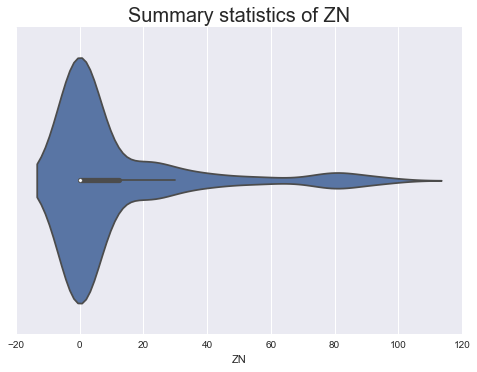

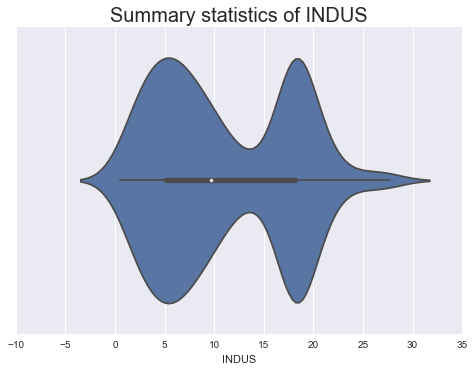

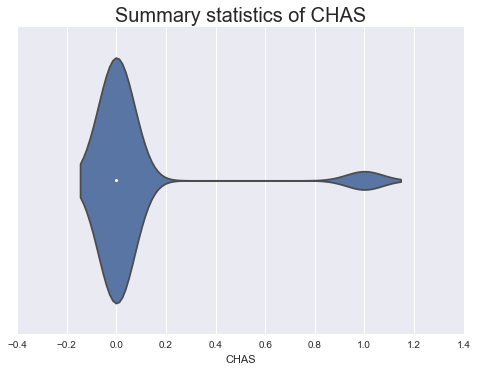

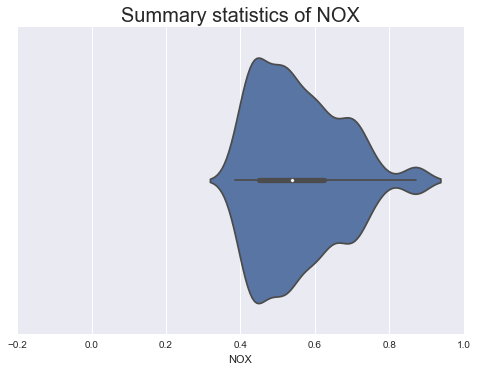

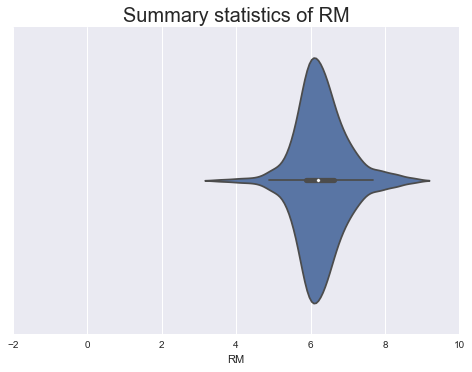

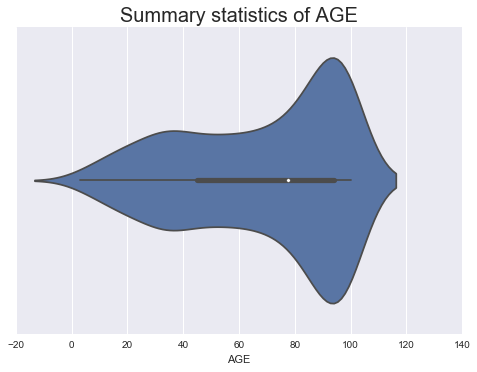

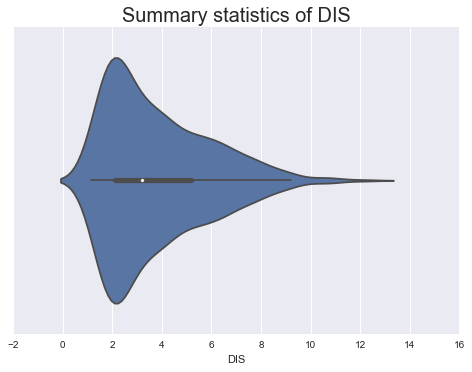

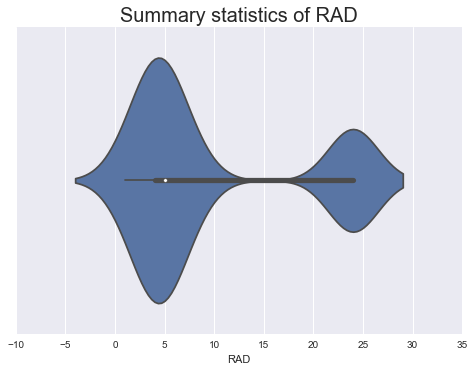

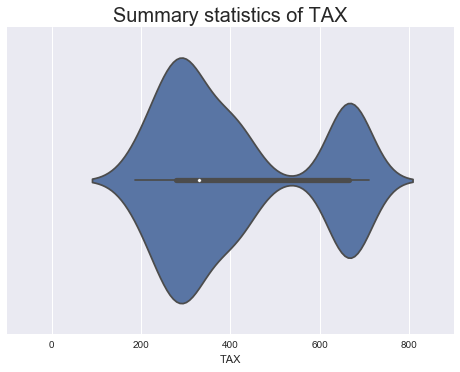

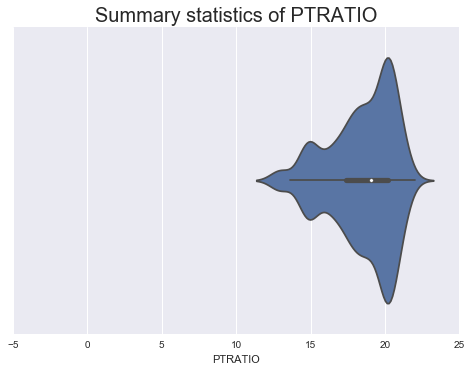

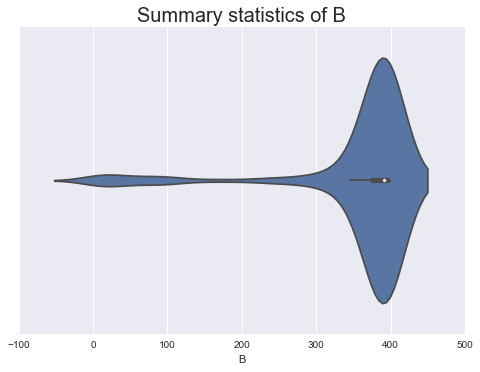

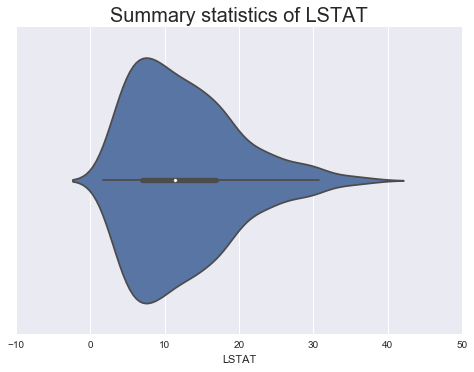

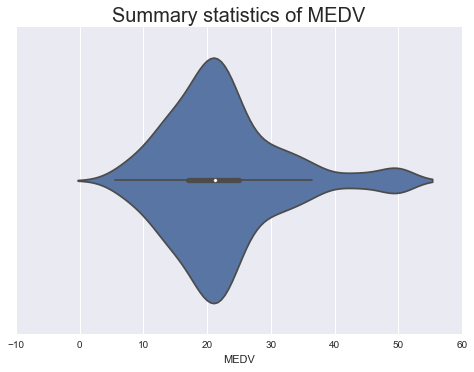

In [14]:
# I used violinplot to describe the summary statistics of each feature 
# With the help of it, apart from knowing mean, min, max, q1, and q3, we can also know kernal density estimation. 

for i in range(0, df.shape[1]):
    sns.violinplot(x = df[df.columns[i]])
    plt.plot(np.std(df[df.columns[i]]), color = 'r')
    plt.title("Summary statistics of " + df.columns[i], fontsize = 20)
    plt.figure()

## 2.1 Price Correlation

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


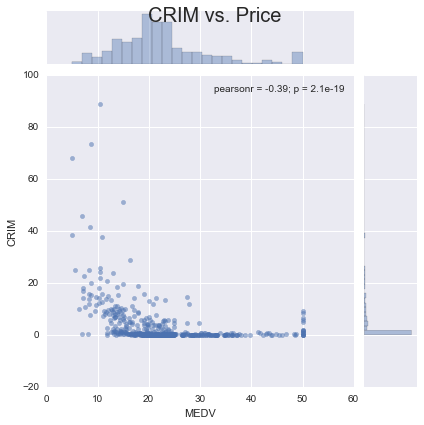

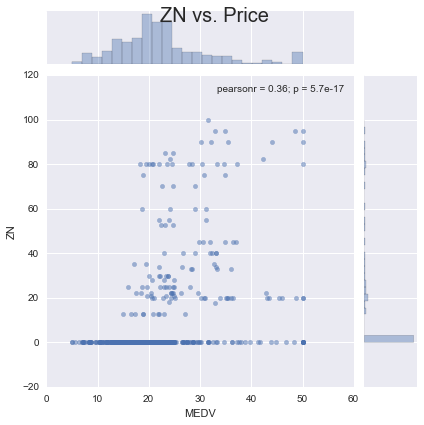

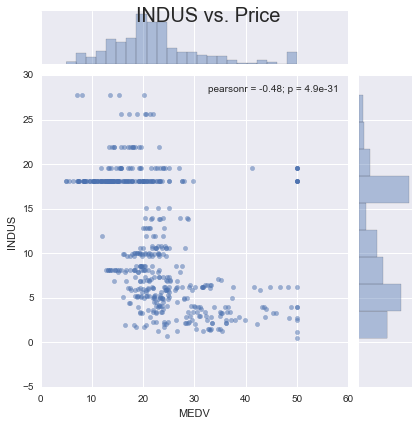

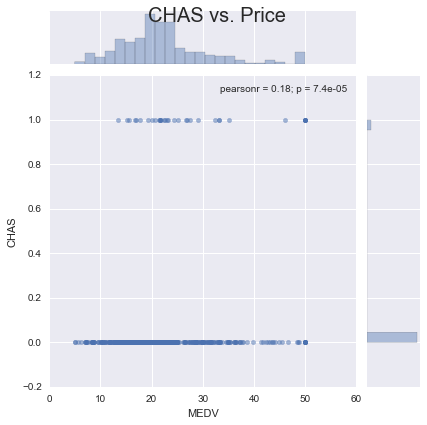

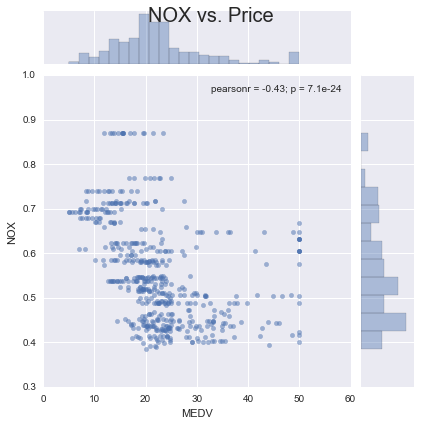

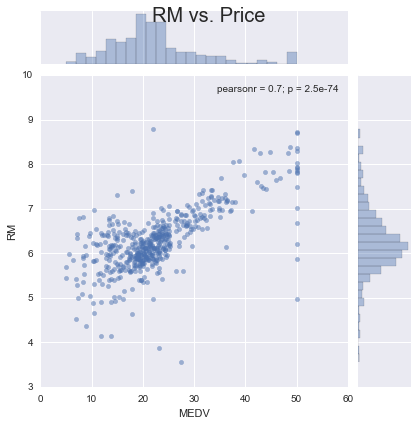

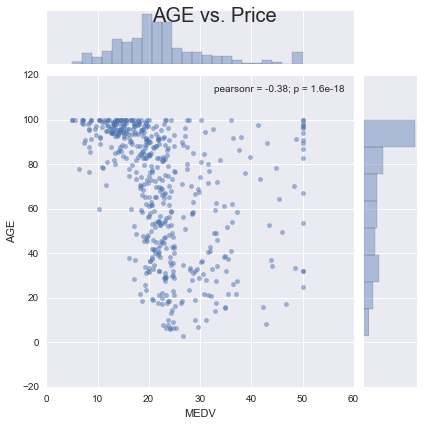

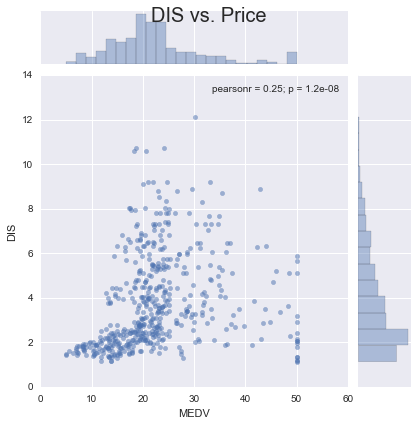

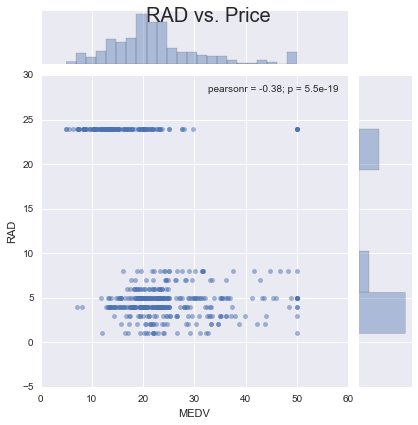

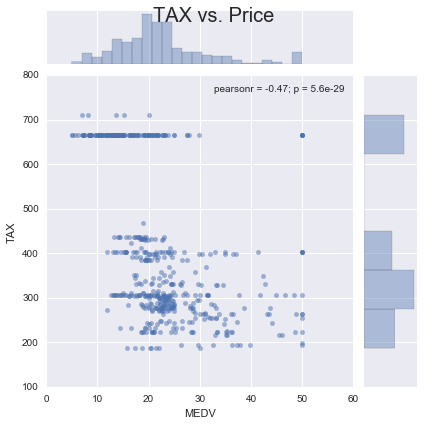

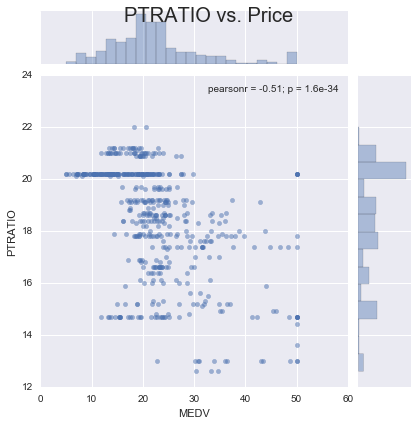

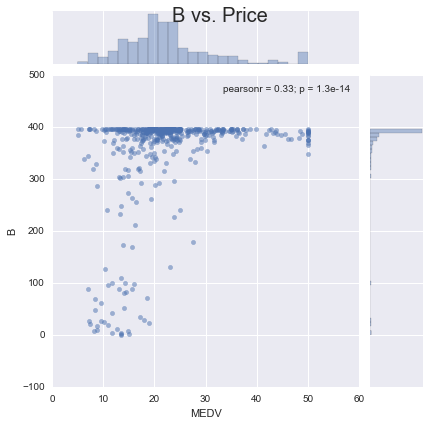

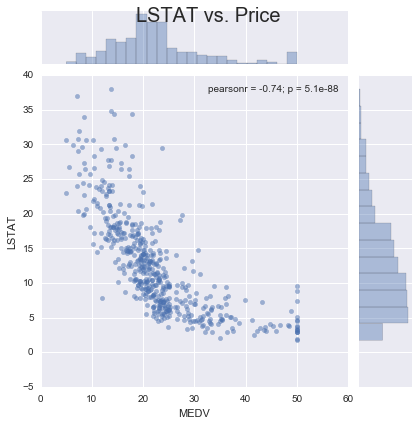

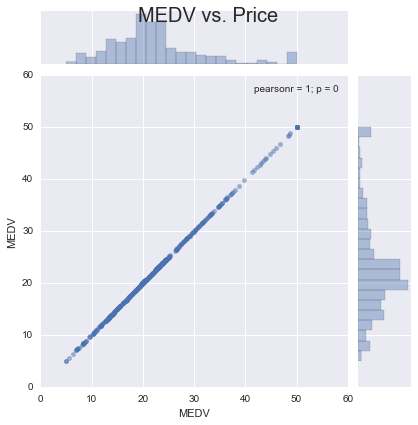

In [16]:
# I used jointplot of seaborn to visualize the scatterplot of each feature vs. Price.
# With this type of plot, we can simultaneously see the histogram as well as scatterplot of the features.
# Also, this type of plot calculates the pearson correlation which do not require separate code.


for i in range(0, df.shape[1]):
    sns.jointplot(df['MEDV'], df[df.columns[i]], kind='scatter', joint_kws={'alpha':0.5});
    plt.suptitle((df.columns[i] + " vs. Price"),fontsize = 20 );
    plt.figure();

## 2.2 Price Correlation

In [17]:
# Here, I have calculated pearson correlation to know which feature correlates with Price the best.
# Then, I sorted the values to see which features highly correlates with the Price column.
# It is found from the below graph that LSTAT has high negative correlation(-0.74) with the Price which increases as Price decreases.
# CHAS feature has comparativley least correlation with Price as it's correlation coeffient is near to zero.(0.17) 
# RM is another feature which has high positive correlation(+0.69) followed by LSTAT. 

pearson_corr = df.corr(method='pearson')

MEDV_corr = (pearson_corr.iloc[-1][:-1]).sort_values()

In [18]:
MEDV_corr

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Name: MEDV, dtype: float64

In [19]:
type(MEDV_corr)

pandas.core.series.Series

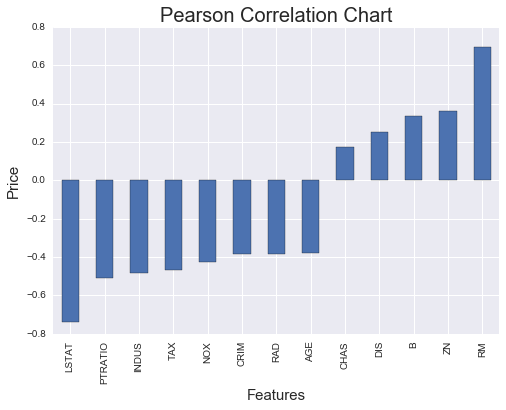

In [20]:
# Plot showing the correlation coeffients of all features with Price in sorted order

MEDV_corr.plot(kind = 'bar')
plt.title('Pearson Correlation Chart', fontsize = 20)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

## 3. Home Similarities

In [21]:
# pdist operates on Numpy matrices, and DataFrame.values is the underlying Numpy NDarray representation of the data frame.
# The metric argument allows you to select one of several built-in distance metrics, or you can pass in any binary function
# to use a custom distance. The result is a "flat" array that consists only of the upper triangle of the distance matrix 
# (because it's symmetric), not including the diagonal (because it's always 0). squareform then translates this flattened
# form into a full matrix.

from scipy.spatial.distance import pdist, squareform

distances = pdist(df, metric='euclidean')
DistMatrix = squareform(distances)

In [22]:
type(DistMatrix)

numpy.ndarray

In [23]:
# finding the distance from home-154, -203,and -485 to all other homes respectively.
home_154 = DistMatrix[154][:]
home_203 = DistMatrix[203][:]
home_485 = DistMatrix[485][:]

In [24]:
# 5 similar homes to 154
home_154.argsort()[1:6]

array([169, 151, 160, 152, 168], dtype=int64)

In [25]:
# 5 similar homes to 203
home_203.argsort()[1:6]

array([204,  55, 256, 283, 291], dtype=int64)

In [26]:
# 5 similar homes to 485
home_485.argsort()[1:6]

array([487, 483, 469, 480, 464], dtype=int64)

## 4. Augmenting the house price data

Here is a link to the new dataset which could be potentially integrated with the current data

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Description: The train data which I will use consists of 1460 rows and 81 features.

The data provides many additional features to add-in such as HouseStyle, YearBuild, Electrical, SaleType and many more. 

I would like to use "TotRmsAbvGrd" from the new dataset, and 'RM' from Boston as a joining condition to integrate two datasets. 

Problem with integration: 'RM' feature has average number of rooms per dwelling, whereas, 'TotRmsAbvGrd' is the total number of rooms. So, we need to calculate the average of the feature before integrating with the Boston dataset. 